# Diversipy Tutorial

This tutorial will walk you through using some of the main functionalities of the `Diversipy` package.

`Diversipy` leverages **_magnitude_** (i.e. effective size) as a **metric for measuring the diversity of metric spaces**.

This package provides the tools for measuring the intrinsic diversity of a space (via `MagArea`), as well as comparing diversity between spaces (via `MagDiff`).

### What is diversity?

Diversity is a difficult notion to define precisely, but it is governed by several axioms that are widely agreed upon. Some of these include:  
- A dataset with a fixed number of points is more diverse when points are separated e.g. distributed uniformly or maximally disordered and becomes less diverse as observations cluster together. Diversity is maximised when points are completely distinct and minimised when all observations are identical.
- Including a new observation should not decrease diversity (monotonicity in observations).
- Including a duplicate observation should not change diversity (twin property).
- Diversity is summarised across multiple scales of (dis)similarity and thus
captures both local and global trends in the data manifold (i.e. should be multi-scale).

See the Appendix of our paper ([Metric Space Magnitude for Evaluating the Diversity of Latent Representations](https://arxiv.org/abs/2311.16054)) for further discussion of diveristy desiderata.

### How can we measure diversity?

We propose **magnitude**, which measures the effective number of distinct points at at a distance scale **t**, as a fitting solution for quantifying diversity. Magnitude functions instrinsically satisfy the above diversity axioms, and outperform other leading metrics (e.g. average similarity) that fail to accurately detect differences in diversity between datasets.

### Tutorial overview:
1. Importing required packages and example datasets
3. Computing magnitude functions
4. Defining the evaluation interval
5. MagArea: An intrinsic measure of diversity
6. MagDiff: Evaluating differences in diversity across datasets

Additionally, the package supports several plotting functionalities, which will be demonstrated over the course of the tutorial.

#### Wanting to zoom in more?

Note that some of the underlying functionality of the Diversipy class is conducted by the Magnipy class, which is the main class that executes magnitude calculations. Please see the Magnipy tutorial to zoom in how these are conducted and additional applications of magnitude.

### 1. Importing Packages and Datasets
Before we begin, we must import the packages required for our functionality.

Please ensure that you have activated your virtual environment and installed the dependencies using poetry before this step (see **Dependencies** in the README).

In [1]:
# Import statements for external packages
from importlib import reload
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Import from magnipy repo
import magnipy
reload(magnipy)
from magnipy.diversipy import Diversipy
from magnipy.utils.datasets import sample_points_gaussian, sample_points_gaussian_2, sample_points_square, hawkes_process
from magnipy.utils.plots import plot_points
from tutorial_data import *

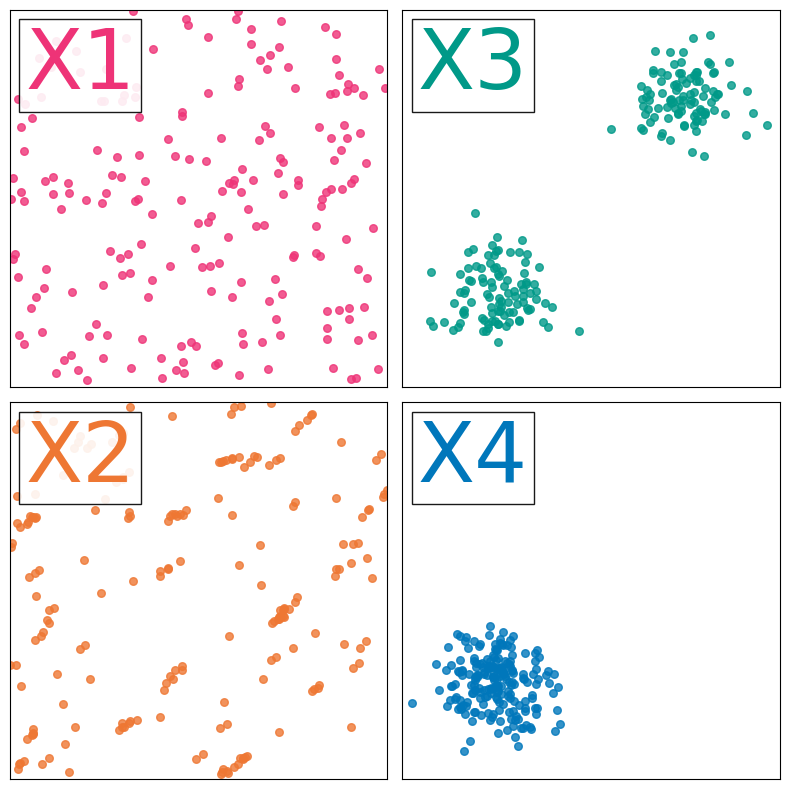

In [3]:
# Grab our example datasets
X1, X2, X3, X4 = get_Xs()
plot_spaces(X1, X2, X3, X4)


**Check Your Understanding:**

Intuitively, which of the above spaces would you consider the most diverse? The least diverse?

### 2. Computing Magnitude Functions

We initialize a Diversipy object with the spaces (**Xs**) that we want to compare. 

Notice that we can specify how many t values (scaling factors) that we want (**n_ts=100**) and our distance metric (**metric="euclidean"**). We can label our spaces via the **names** parameter.

For more customization options and parameters, see `diversipy.py`.

In [4]:
Xs = [X1, X2, X3, X4]
names = ["X1 (Uniform)", "X2 (Slightly Clustered)", "X3 (Two Gaussians)", "X4 (One Gaussian)"]
div = Diversipy(Xs = Xs, n_ts=100, metric="euclidean", names=names)

In [5]:
# Computing magnitude and finding evaluation intervals.

mag_df, ts = div.get_magnitude_functions()
print(f'Dataframe of magnitude functions has shape (# magnitude functions, # datapoints per function): {mag_df.shape}')
print(f'Common Evaluation Interval: {ts[0]} to {ts[-1]}')

Dataframe of magnitude functions has shape (# magnitude functions, # datapoints per function): (4, 100)
Common Evaluation Interval: 0.0 to 206.78878134111483


### 3. Defining the Evaluation Interval

For each magnitude function, we calculate the **convergence scale**: the scaling factor at which the effective number of points is equivalent to 95% of the cardinality of the space, i.e. 95% of points are considered distinct. This percentage can be customized via the **target_prop** parameter upon initialization of the Diversipy object.

We define each function's **evaluation interval** from zero until this convergence scale.

Note that in order to effectively compare diversity, we must use the same evaluation interval for all. By default, we take the median of the convergence scale for all spaces as our evaluation interval.  Instead of the median, the desired quantile can be customized via the **q** parameter upon initialization of the Diversipy object.

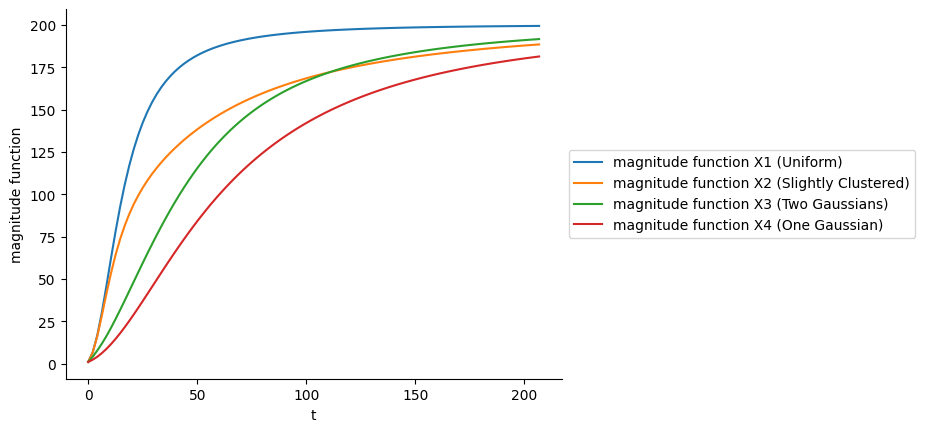

In [6]:
# Plotting magnitude functions

div.plot_magnitude_functions()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### 4. Intrinsic Diversity: **MagArea**

We define the concept of **MagArea** for a space as the area underneath its magnitude function, which we use to define a space's intrinsic diversity. The higher the MagArea, the more diverse the space.

**Check Your Understanding:**

Based on the magnitude functions plotted above (and your instinct about the spaces themselves), which space would you expect to have the highest MagArea? The lowest?

In [7]:
# Computing MagArea
mag_areas = div.MagAreas()
print("MagArea Values:")
for idx in range(0, len(mag_areas)):
    print(f'{names[idx]}: {mag_areas[idx]}')

MagArea Values:
X1 (Uniform): 177.84095591771853
X2 (Slightly Clustered): 153.01032846971302
X3 (Two Gaussians): 143.962669333334
X4 (One Gaussian): 123.69005132177372


Do these values confirm what you expected?

### 5. Comparing Diversity: **MagDiff**

Further, we can conduct more detailed comparisons by computing **MagDiff**, the area between two magnitude functions, as a measure of dissimilarity.

By default, we compute the pairwise MagDiff between each of our spaces, resulting in a comparison matrix.

However, you can also specify a reference space when initializing Diversipy (using the **ref_space** parameter), against which to compare all spaces. To do so, set parameter **pairwise=False** when calling MagDiff.

In [8]:
# Compute pairwise MagDiff
diffs = div.MagDiffs()

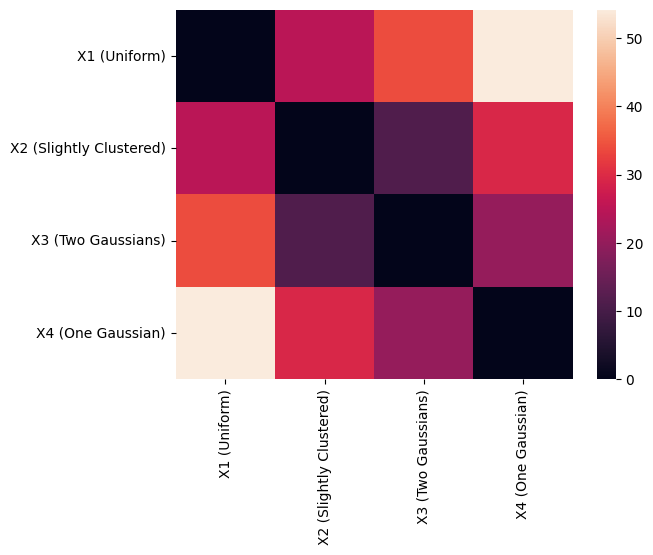

In [9]:
# Plot pairwise MagDiffs
div.plot_MagDiffs_heatmap()

**Check Your Understanding:**

1. Notice how the MagDiff comparing the a space to itself is 0, i.e. there is no difference in diversity.

2. Also notice how the MagDiff between X1 (the most diverse) and X4 (the least diverse) has the highest value, i.e. lightest color.

###  Nice work!

This concludes the Diversipy tutorial.

To investigate magnitude calculations more closely, please see our Magnipy Tutorial (`magnipy_tutorial.ipynb`).